# Hidden Markov Models for Weather Prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [3]:
#Data Generation
#Define states and parameters
states = ['Sunny', 'Cloudy', 'Rainy']
n_states = len(states)

In [5]:
# Emission parameters (means and covariances)
means = np.array([
    [30, 40], #sunny
    [25, 60], #cloudy
    [20, 80]  #rainy
])

covars = np.array([
    [[5, 0], [0, 5]], #sunny
    [[4, 0], [0, 4]], #cloudy
    [[3, 0], [0, 3]]  #rainy
])

In [9]:
#Generate Synthetic data
np.random.seed(42)
n_samples = 300
hidden_states = np.random.choice(n_states, size=n_samples, p=[0.5, 0.3, 0.2])
observations = np.array([
    np.random.multivariate_normal(means[state], covars[state])
    for state in hidden_states
])

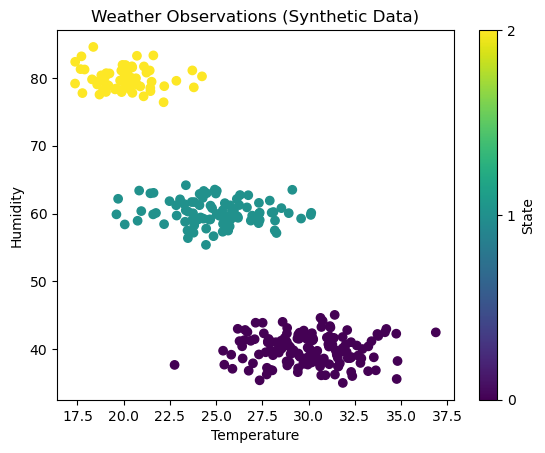

In [11]:
#plot the generated observations
plt.scatter(observations[:, 0], observations[:, 1], c=hidden_states, cmap='viridis')
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.title("Weather Observations (Synthetic Data)")
plt.colorbar(ticks=[0, 1, 2], label='State')
plt.show()

In [13]:
#Discrete HMM
#Discretizing the continuous observations into bins
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
X_discrete = discretizer.fit_transform(observations).astype(int)

In [15]:
#Reshape for hmmlearn input
X_discrete_seq = X_discrete[:, 0].reshape(-1, 1)

hmm_discrete = hmm.CategoricalHMM(n_components=n_states, n_iter=100)
hmm_discrete.fit(X_discrete_seq)
hidden_preds_discrete = hmm_discrete.predict(X_discrete_seq)

In [17]:
#Accuracy and confusion matrix for Discrete HMM
accuracy_discrete = np.mean(hidden_preds_discrete == hidden_states)
print(f"Discrete HMM Accuracy: {accuracy_discrete:.2f}")

Discrete HMM Accuracy: 0.33


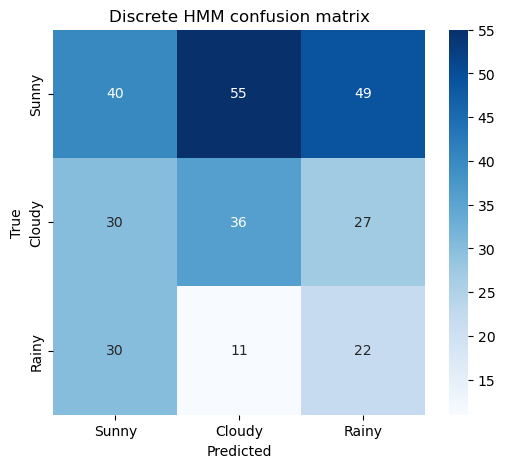

In [19]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(hidden_states, hidden_preds_discrete),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=states, yticklabels=states)
plt.title("Discrete HMM confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [21]:
#Continuous HMM
hmm_cont = hmm.GaussianHMM(n_components=n_states, covariance_type='full', n_iter=100)
hmm_cont.fit(observations)
hidden_preds_cont = hmm_cont.predict(observations)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [23]:
#Accuracy and confusion matrix for Continuous HMM
accuracy_cont = np.mean(hidden_preds_cont == hidden_states)
print(f"Continuous HMM Accuracy: {accuracy_cont:.2f}")

Continuous HMM Accuracy: 0.11


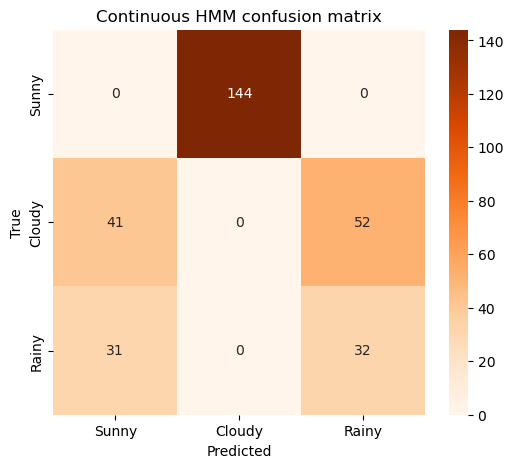

In [25]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(hidden_states, hidden_preds_cont),
            annot=True, fmt='d', cmap='Oranges',
            xticklabels=states, yticklabels=states)
plt.title("Continuous HMM confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

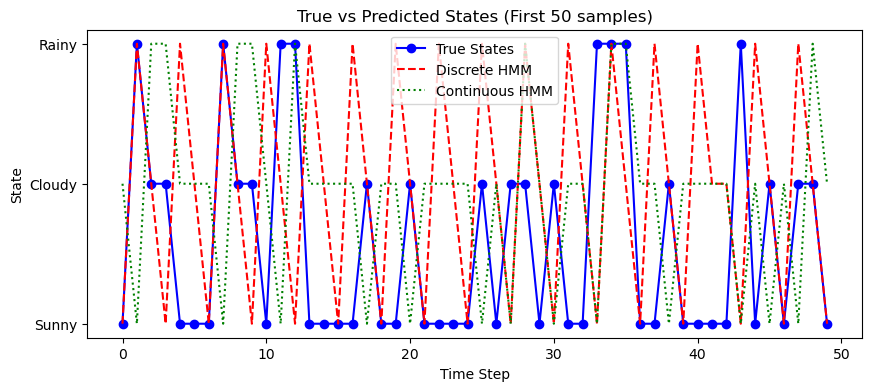

In [31]:
#Visual Comparison
plt.figure(figsize=(10, 4))
plt.plot(hidden_states[:50], 'bo-', label='True States')
plt.plot(hidden_preds_discrete[:50], 'r--', label='Discrete HMM')
plt.plot(hidden_preds_cont[:50], 'g:', label='Continuous HMM')
plt.legend()
plt.xlabel("Time Step")
plt.ylabel("State")
plt.title("True vs Predicted States (First 50 samples)")
plt.yticks([0, 1, 2], states)
plt.show()

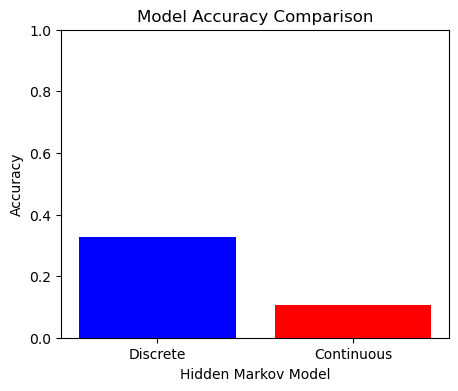

In [33]:
#Accuracy Comparison Bar Plot
plt.figure(figsize=(5, 4))
plt.bar(["Discrete", "Continuous"], [accuracy_discrete, accuracy_cont], color=['blue', 'red'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Hidden Markov Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()